# Eksamen i Datalogi for fysikere

## Anders Terp Kjølhede (NZD737)

## Generel introduktion

For at bestemme en partikels bane omkring en masse M vil vi benytte schwarzchilds løsning af den generelle relativitetsteori.

Følgende udregninger er opnået numerisk til fordel for differentiel geometri.

Vi definere kraften på en masse m, med en relativ position fra en sfærisk symmetrisk masse M, til at være.

$$\vec{F}=-\frac{GMm}{r^3}\vec{r}\left(1+\frac{3l^2}{c^2r^2}\right)$$

Hvor G er tyngdekonstanten og c er lysets hastighed

$$G \approx 6.67430 \times 10^{-11}/kgs$$

$$c = 299792458 m/s$$

og $\vec{r}$ er retningsvektoren mellem massen M og massen masse. $l = ||v \times \vec{r}||$ er det angulære moment pr. længdeenhed, hvor $\vec{v}$ er massens hastighedsvektor.

Det sidste led i parantesen ovenfor er en generel relativistisk korrektion som for det klassiske tilfælde forsvinder da $c \rightarrow \infty$. Her ender vi med det klassiske udtryk for tyngdekraften mellem de to masser.

$$\vec{F}^{CL} = \frac{GMm}{r^3}\vec{r}$$

## Behandling af enheder

Vi vælger her at arbejde med naturlige enheder hvilket vil sige følgende lighed kan laves med nævnte enheder.

$$G=c=\hbar = k_B = 1$$

Vi har allerede kendskab til G og c som hhv. tyngdekonstanten og lysets hastighed. $\hbar = \frac{h}{2\pi}$, hvor $h$ er plancks konstant. Næsten samme form gælder for $k_B = \frac{B}{2\pi}$, bortset fra at det her er Boltzmanns konstant.

Vi kan også definere afstande i enheder af Schwarzchild radiusen (også kaldet event horizon) til at være nedenstående i det tilfælde af normalt brug af enheder.

$$R_S = \frac{2MG}{c^2}$$

og 

$$R_S = 2M$$

Ved brug af naturlige enheder.

Vi introducerer også nogle dimensionsløse variable som vil bliver brugt senere i dette opgavesæt.

$$\rho = \frac{r}{R_S} = \frac{r}{2M}$$

$$T = \frac{\tau}{R_S}$$

Hvor $\tau$ er egentiden som har enhed af masse.

Det angulære moment per masse enhed er givet Ved

$$l^2=||\vec{v}\times \vec{r}||^2$$

Til sidst derfinerer vi den dimensionsløse variabel 

$$\lambda = \frac{l}{R_S}$$



## Spørgsmål 1 

Det kan være brugbart at arbejde med naturlige enheder når man foretager beregninger i generel relativitetsteori, da disse ligninger ofte bliver mere simple fordi alle steder hvor der står $G$,$c$,$\hbar$ eller $k_B$ bliver elimineret. F.eks. i den tidligere defineret Schwarzchild radius som bliver til $R_S= 2M$. Man kan gange de naturlige enheder på det originale udtryk i en hvilken som helst eksponent for at komme tilbage til det korrekte udtryk.

In [1]:
import numpy as np
import scipy
from scipy import constants

R_sol_OU = 2*1.98847e30*scipy.constants.G/scipy.constants.c**2 #Schwarzchild radius i SI-enheder

R_sol_NU = 2*1.98847e30 #Schwarzchild radius i naturlige enheder

print(f'Schwarzchild radiusen for solen med almindelig enhedsnotation er {R_sol_OU} og {R_sol_NU} ved brug af naturlige enheder der eliminerer G og c')





Schwarzchild radiusen for solen med almindelig enhedsnotation er 2953.3393820668784 og 3.97694e+30 ved brug af naturlige enheder der eliminerer G og c


## Beskrivelse af systemet

Vores system kan beskrives ved ligningen 

$$\varepsilon = \frac{1}{2}\left(\frac{d\rho}{dT}\right)^2+V_{eff}(\rho)$$

Her er $\varepsilon$ energitætheden af massen m. I den klassiske grænse bliver dette til

$$V_{eff}^{CL}(\rho) = -\frac{1}{2\rho}+\frac{\lambda^2}{2\rho^2}$$

Mens i tilfældet med generel relativitetsteori får.

$$V_{eff}^{GR}(\rho) = -\frac{1}{2\rho}+\frac{\lambda^2}{2\rho^2}-\frac{\lambda^2}{2\rho^3}$$



## Spørgsmål 2(a)

I følgende beregner jeg det effektive potential som funktion $\rho$ og $\lambda$ for både det klassiske og relativistiske tilfælde. Bemærk her at der er ganget en faktor $a = 1/c$ på som enten er $1$ hvis $c=1$ og funktionen bliver derfor relativistisk. I den anden ende af spektret får vi at $a$ bliver 0 hvis $c\rightarrow \infty$, og vi ender med det klassiske tilfælde. PÅ denne måde kan jeg beregne for begge tilfælde med en funktion.

In [2]:
import numpy as np 
import scipy

#p = r/R_sol_NU #rho udtrykt i r (afstanden mellem 2 legemer) og schwarzchuild radiusen i naturlige enheder (R_sol_NU)

#L = l/R_sol_NU #lambda udtrykt i det angulære moment per masse enhed (l) og schwarzchuild radiusen i naturlige enheder (R_sol_NU)


def funk(p,L,a):
    V = -1/(2*p)+L**2/(2*p**2)-L**2/(2*p**3)*a
    return V

funk(1,2,1)

-0.5

## Spørgsmål 2 (b)

Vi ved at i det klassiske tilfælde har den effektive potential energi $(V_{eff})$ et lokalt minimum for $\rho \in R^+$, mens at der for generel relativitetsteori findes både et lokalt minimum og et lokalt maximum. Ved at vælge et fast lambda, som i dette tilfælde er $\lambda = 2$, og et fast $a$ så det gælder at det enten er klassisk eller relativistisk tilfælde vi arbejder med.

In [3]:
import numpy as np 
from scipy.signal import argrelextrema

#Finder minimum for CL

x_CL = np.array([]) #Funktionsværdier for forskellige værdier af rho

for i in range(1,31):
    x_CL=np.append(x_CL,funk(i,2,0))


min_CL = x_CL[argrelextrema(x_CL,np.less)] #Finder værdien af indekset givet af np.less

print(f'Det lokale minimum for klassisk mekanik {min_CL}')

#Finder minimum for GR

x_GRmin = np.array([]) #Funktionsværdier for forskellige værdier af rho

for i in range(1,31):
    x_GRmin=np.append(x_GRmin,funk(i,2,1))


min_GR = x_GRmin[argrelextrema(x_GRmin,np.less)] #Finder værdien af indekset givet af np.less

print(f'Det lokale minimum for generel relativitetsteori {min_GR}')


#Finder Maximum for GR

x_GRmax = np.array([]) #Funktionsværdier for forskellige værdier af rho

for i in range(1,31):
    x_GRmax=np.append(x_GRmax,funk(i,2,1))

max_GR = x_GRmax[argrelextrema(x_GRmax,np.greater)] #Finder værdien af indekset givet af np.greater

print(f'Det lokale maximum for generel relativitetsteori {max_GR}')


Det lokale minimum for klassisk mekanik [-0.03125]
Det lokale minimum for generel relativitetsteori [-0.03703704]
Det lokale maximum for generel relativitetsteori [0.]


## Spørgsmål 2(c)

Her sætter jeg lambda til at være $\lambda = 2$ og ønsker herefter at plotte begge potentialer for henholdsvis CL og GR over et interval for $\rho \in [1,30]$ 

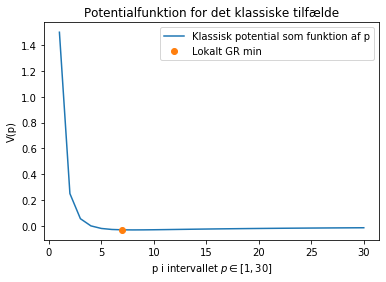

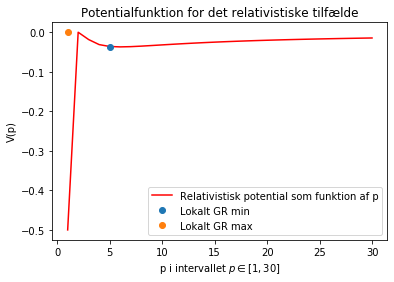

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 

xP = np.arange(1,31)

plt.plot(xP,x_CL, label='Klassisk potential som funktion af p')
plt.plot(argrelextrema(x_CL,np.less),min_CL,'o',label='Lokalt GR min')
plt.title('Potentialfunktion for det klassiske tilfælde')
plt.xlabel('p i intervallet $p \in [1,30]$')
plt.ylabel('V(p)')
plt.legend()
plt.show()

plt.plot(xP,x_GRmin,'r-', label='Relativistisk potential som funktion af p')
plt.plot(argrelextrema(x_GRmin,np.less),min_GR,'o', label='Lokalt GR min')
plt.plot(argrelextrema(x_GRmax,np.greater),max_GR,'o', label='Lokalt GR max')
plt.title('Potentialfunktion for det relativistiske tilfælde')
plt.xlabel('p i intervallet $p \in [1,30]$')
plt.ylabel('V(p)')
plt.legend()
plt.show()



Bemærk at i det klassiske tilfælde går potentialet mod $\infty$ når $\rho$ nærmer sig 0, dvs $\rho \rightarrow 0$. I det relativistiske tilfælde går dette mod $-\infty$

## Bevægelsesligninger og orbitaler

Vi benytter her Newtons 2. lov som grundstenen til de bevægelsesligninger vi ønsker at få ud.

$$\vec{F}= m\vec{a} = m\frac{d^2\vec{x}}{dt^2}$$

Da vi har angulært moment bevarelse vil massen m bevæge sig i et 2 dimensionelt plan. Vi kan her igen benytte os af de dimensionsløse variable $\rho$ og $\lambda$ som vi definerede tidligere til at udtrykke Newtons 2. lov.

$$\frac{d^2\vec{\rho}}{dT^2}= -\hat{\rho} \frac{1}{2\rho^2}\left(1+\frac{3\lambda^2}{\rho^2}\right) = -\frac{\vec{\rho}}{\rho}\frac{1}{2\rho^2}\left(1+\frac{3\lambda^2}{\rho^2}\right)$$

Her er $\vec{\rho} = (\rho_x,\rho_y)$, $\rho = ||\vec{\rho}||=\sqrt{\rho_x^2+\rho_y^2}$ er afstanden til centret af massen M og $\hat{\rho}=\frac{\vec{\rho}}{\rho}$ er en enhedsvektor langs $\vec{\rho}$.

Fra denne ligning kan vi opstille 4 første ordens koblede differentialligninger.

$$\frac{d\rho_x}{dT}=v_x$$

$$\frac{d\rho_y}{dT}=v_y$$

$$\frac{dv_x}{dT}=-\frac{\rho_x}{2\rho^3}\left(1+ \frac{3\lambda^2}{\rho^2}\right)$$

$$\frac{dv_y}{dT}=-\frac{\rho_y}{2\rho^3}\left(1+ \frac{3\lambda^2}{\rho^2}\right)$$

Det ses at $\vec{v} = (v_x,v_y)$ er hastigheden af massen $m$ i to dimensioner, samt at det angulære moment pr. masseenhed ($\lambda$) er defineret ved

$$\lambda = ||\vec{v} \times \vec{\rho}|| = \rho_x v_y-\rho_x v_x$$

Det er også værd at bemærke at den radielle hastighed $$\frac{d\rho}{dT} = \frac{\rho_x v_x +\rho_y v_y}{\sqrt(\rho_x^2+\rho_y^2)}$$

Da vi herefter kan opsrkive den kientiske del af energitætheden til følgende

$$T = \frac{1}{2}\left(\frac{d\rho}{dT}\right)$$

og den potentielle herefter til at være

$$U = -\frac{1}{2\rho}+\frac{\lambda^2}{2\rho^2}-\frac{\lambda^2}{2rho^2}$$

De givne differentialligninger udgør sammen med følgende startbetingelser 

$$\vec{\rho}(T=0)=\vec{\rho_0}$$
$$\vec{v}(T=0)=\vec{v_0}$$

det begyndelsesværdi (initial value problem) som vi kan løse numerisk.

De forskellige orbitaler som bliver fokuseret på i denne opgave afhænger kraftigt af hvilke startbetingelser vi giver vores funktion.

Der er her tale om 3 forskellige former for orbitaler. Den bundne orbital som er repræsenteret ved cirkler eller ellipser, spredningsorbitaler som kan genkendes ved hyperboler og til sidst det radielle dyk hvor banen bevæger sig ind under begivenhedshorisonten.



## Spørgsmål 3

## 3(a) - Definer differential ligninger

Her har jeg indskrevet højre højre side af differentialligninger samt defineret funktioner for lambda og rho. Denne funktion returnere de afledte.

In [5]:
import numpy as np

#Defining our differential equations 


def diff(px,py,vx,vy):
        
    inspar = (px,py,vx,vy)

    def lam(px,py,vx,vy):
        lamd = px*vy-py*vx
        return lamd

    def p(px,py):
        rho = np.sqrt(px**2+py**2)
        return rho


    ax = -inspar[0]/(2*p(inspar[0],inspar[1])**3)*(1+3*lam(inspar[0],inspar[1],inspar[2],inspar[3])**2/p(inspar[0],inspar[1])**2)

    ay = -inspar[1]/(2*p(inspar[0],inspar[1])**3)*(1+3*lam(inspar[0],inspar[1],inspar[2],inspar[3])**2/p(inspar[0],inspar[1])**2)

    dpx = inspar[2]

    dpy = inspar[3]

    dvx = ax

    dvy = ay

    return dpx,dpy,dvx,dvy


diff(0,10,0.1845,0)

(0.1845, 0, 0.0, -0.005510603750000001)

## 3(b) - Implementer terminating conditions

Det er af stor interresse at sætte nogle stop betingelser så vores beregninger ikke fortsætter for evigt. I tilfældet med de bundne orbitaler vil massen $m$ fortsætte med at kredse om $M$ og det giver derfor mening at stoppe vores beregninger når der er gået en tilpas mængde tid.

For spredningsorbitalerne vil massen $m$ til sidst bevæger sig meget langt væk fra $M$ og vi kan derfor stoppe vores beregner når den er nået længere væk en den position som vi startede den i, dvs.

$$||\vec{\rho}(T)||>2||\vec{\rho_0}||$$

I tilfældet af det radielle dyk vil massen $m$ på et tidspunkt bevæge sig ind under begivenhedshorisonten og det vil herfra ikke give mening at fortsætte vores beregninger, dvs.

$$||\vec{\rho}(T)<R_S||$$

Hvor schwarzchild radiussen er 1 med vores dimensionsløse variable.

## 3(c) - Løs differentialligninger

Fra funktionen hvor jeg definerer vores kan jeg nu opstille en funktion der løser disse differentialligninger, som tager mine startbetingelser som variable og den maksimale tid beregningerne skal tage. Funktion returnere steder og hastigheder til alle tider, samt disse tider. 

In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np

def orb(px,py,vx,vy,tmax,RS):

    inspar = (px,py,vx,vy)

    def diff(t,inspar):

        def lam(px,py,vx,vy):
            lamd = px*vy-py*vx
            return lamd

        def p(px,py):
            rho = np.sqrt(px**2+py**2)
            return rho


        ax = -inspar[0]/(2*p(inspar[0],inspar[1])**3)*(1+3*lam(inspar[0],inspar[1],inspar[2],inspar[3])**2/p(inspar[0],inspar[1])**2)

        ay = -inspar[1]/(2*p(inspar[0],inspar[1])**3)*(1+3*lam(inspar[0],inspar[1],inspar[2],inspar[3])**2/p(inspar[0],inspar[1])**2)

        dpx = inspar[2]

        dpy = inspar[3]

        dvx = ax

        dvy = ay

        return dpx,dpy,dvx,dvy

    tstart = 0 
    tend = tmax
    t = np.linspace(tstart,tend,1200)

    sol = solve_ivp(diff,[t[0],t[-1]], inspar, method='RK45', t_eval=t,rtol=(10**(-4)))

    
    posx = sol.y[0]
    posy = sol.y[1]
    velx = sol.y[2]
    vely = sol.y[3]
    t = sol.t

    return posx,posy,velx,vely,t

resultsRAD = orb(0,10,0.1845,0,175,1)
resultsBUND = orb(0,10,0.2,0,2000,1)
resultsSPRED = orb(0,10,0.2,-0.25,100,1)


## Spørgsmål 3(d)

Jeg kan nu definerer en funktion der illustrerer vores orbitaler ved at plotte x-postioner mod y-positioner. Derudover kan jeg illustrerer vores begivenhedshorisont samt massen $M$.

In [2]:
def orbvis(x,y):
    plt.plot(x,y,'-r', label = 'Orbit')
    plt.xlabel('Postion x')
    plt.ylabel('Postion y')
    plt.axis('scaled')
    plt.legend()
    return

def horizont(R):
    theta = np.linspace(0,2*np.pi,1000)
    x = R*np.cos(theta)
    y = R*np.sin(theta)
    
    plt.plot(x,y,'-g', label = 'Event horizon')
    plt.plot(0,0,'o', label = 'M')
    plt.legend()
    return
    
    

## Spørgsmål 3(e)

Jeg kan nu beregne og illustrere mine orbitaler givet følgende startbetingelser

1) Radiel dyk

$$\vec{\rho_0} = 0\hat{x} + 10\hat{y} \hspace{2in} \vec{v_0} = 0.1845\hat{x} + 0\hat{y}$$

2) Bundet orbital

$$\vec{\rho_0} = 0\hat{x} + 10\hat{y} \hspace{2in} \vec{v_0} = 0.2\hat{x} + 0\hat{y}$$

3) Spredningsorbital

$$\vec{\rho_0} = 0\hat{x} + 10\hat{y} \hspace{2in} \vec{v_0} = 0.2\hat{x} - 0.25\hat{y}$$

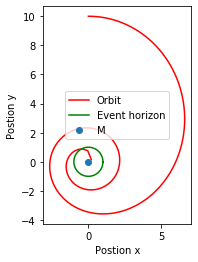

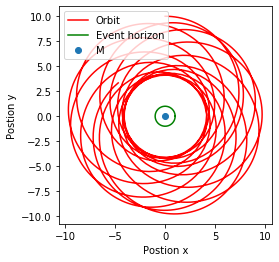

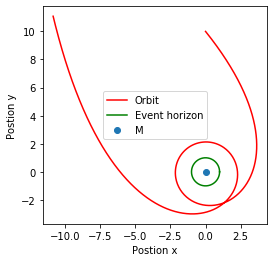

In [8]:
orbvis(resultsRAD[0],resultsRAD[1])
horizont(1)
plt.show()

orbvis(resultsBUND[0],resultsBUND[1])
horizont(1)
plt.legend()
plt.show()

orbvis(resultsSPRED[0],resultsSPRED[1])
horizont(1)
plt.legend()
plt.show()


## Energi og angulært moment bevarelse

Energitæthede er givet som 

$$\varepsilon = \tau + U$$

og det angulære moment som 

$$\lambda = ||\vec{v} \times \vec{\rho}||$$

dette er bevaret som nævnt før. Den kinetiske energitæthed er givet ved følgende

$$\tau = \frac{1}{2}\left(\frac{d\rho}{dT}\right)^2 = \frac{1}{2} \frac{(\rho_x v_x +\rho_y v_y)^2}{\rho_x^2 + \rho_y^2}$$

og den potentielle energitæthed givet ved

$$U = -\frac{1}{2\rho}+\frac{\lambda^2}{2\rho^2}-\frac{\lambda^2}{2\rho^3}$$



## Spørgsmål 4(a)

For stederne og hastihederne der løber i vores tidsinterval som er defineret i Spørgsmål 3(c)

$$R = \{ \rho(T_i) | T_i \in T \}$$

$$Y = \{ v(T_i) | T_i \in T \}$$

 vil vi gerne beregne $\lambda$ til alle tider. I Spørgsmål 3(a) har jeg allerede defineret en funktion for $\lambda$ og kan dermed genbruge denne hvis jeg ændre på argumenterne, så $\lambda$ nu afhænger af de positioner og hastigheder jeg har fået som løsninger til mine differentialligninger.

In [9]:
def lam(px,py,vx,vy):
    lamd = px*vy-py*vx
    return lamd


lam(resultsRAD[0],resultsRAD[1],resultsRAD[2],resultsRAD[3])
lam(resultsBUND[0],resultsBUND[1],resultsBUND[2],resultsBUND[3])
lam(resultsSPRED[0],resultsSPRED[1],resultsSPRED[2],resultsSPRED[3])


array([-2.        , -2.        , -2.        , ..., -1.99867003,
       -1.99867003, -1.99867003])

## Spørgsmål 4(b)

Givet de samme intervaller for hastighederne og stederne 

$$R = \{ \rho(T_i) | T_i \in T \}$$

$$Y = \{ v(T_i) | T_i \in T \}$$

som er beregnet af vores funktion der løser førnævnte differentialligninger. Vi ønsker nu at beregne den kinetiske og potetielle energitæthed ($\tau$ og $U$) til hver tid, og giver os den samlede totale energitæthed 

$$\varepsilon = \tau + U$$

In [10]:
def p(px,py):
    rho = np.sqrt(px**2+py**2)
    return rho

def energi(px,py,vx,vy):
    
    T = 1/2*(px*vx+py*vy)**2/(px**2+py**2)
    
    U = -1/(2*p(px,py))+lam(px,py,vx,vy)**2/(2*p(px,py)**2)-lam(px,py,vx,vy)**2/(2*p(px,py)**3)

    E = T + U

    return T,U,E

res_enRAD = energi(resultsRAD[0],resultsRAD[1],resultsRAD[2],resultsRAD[3])

res_enBUND = energi(resultsBUND[0],resultsBUND[1],resultsBUND[2],resultsBUND[3])

res_enSPRED = energi(resultsSPRED[0],resultsSPRED[1],resultsSPRED[2],resultsSPRED[3])

## Spørgsmål 4(c)

Her definerer jeg en funktion der tager den totale, kinetiske og potentielle energi som argumenter og plotter disse som funktion af tiden.

In [3]:


def energivis(x,y,z,px,py,vx,vy,t):
    
    fig, ax1 = plt.subplots()
    
    p1 = ax1.plot(t,x, label= 'Kinetisk energi')
    p2 = ax1.plot(t,y, label= 'Potentiel energi')
    p3 = ax1.plot(t,z, label= 'Total energi')
    ax1.set_xlabel('Tid [t]')
    ax1.set_ylabel('Energi')
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
    

    ax2 = ax1.twinx()
    
    color = 'tab:red'
    p4 = ax2.plot(t,lam(px,py,vx,vy),'-r',label = 'Lambda', color=color)
    ax2.set_xlabel('Tid [t]')
    ax2.set_ylabel('$\lambda$', color=color)
    plt.legend()

    plt.title('Energi og angulært moment pr. masse enhed')
    
    plt.show()
    return
    

## Spørgsmål 4(d)

Vi ønsker nu at illustrerer $\tau$, $U$, $\varepsilon$ og $\lambda$ og dette kan jeg gøre ved at benytte min $\lambda$ funktion samt vores funktion der illustrerer de forskellige energier fra opgave 4(c).

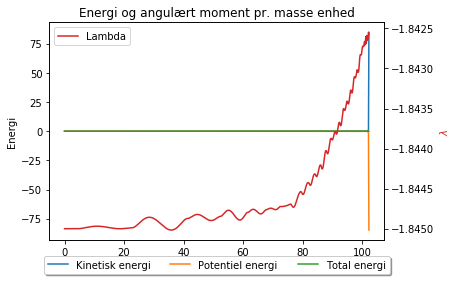

In [12]:
energivis(res_enRAD[0],res_enRAD[1],res_enRAD[2],resultsRAD[0],resultsRAD[1],resultsRAD[2],resultsRAD[3],resultsRAD[4])

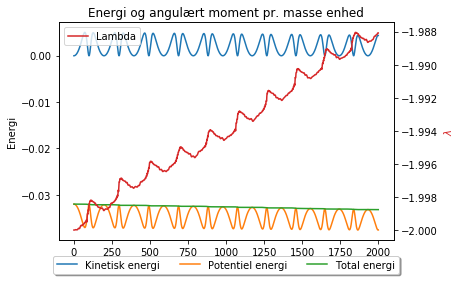

In [13]:
energivis(res_enBUND[0],res_enBUND[1],res_enBUND[2],resultsBUND[0],resultsBUND[1],resultsBUND[2],resultsBUND[3],resultsBUND[4])


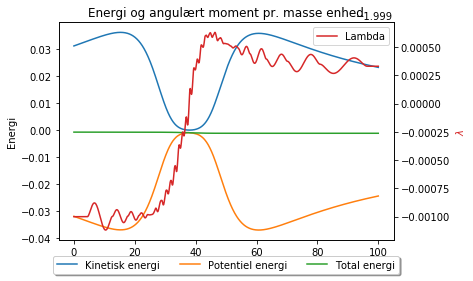

In [14]:
energivis(res_enSPRED[0],res_enSPRED[1],res_enSPRED[2],resultsSPRED[0],resultsSPRED[1],resultsSPRED[2],resultsSPRED[3],resultsSPRED[4])

Det ses i de ovenstående plot for alle tre orbitaler at den totale energi er bevaret hvilket også er hvad vi har forventet. Vi kan se at at $\lambda$ tilnærmelsesvis er bevaret bortset fra når $m$ opnår en større hastighed og er tæt på begivenhedshorisonten, her vil $\lambda$ ikke være bevaret som man også tydeligt kan så på ovenstående 3 plot, da den kinetiske energi bliver meget stor. 

## Spørgsmål 5 - Validation

Inden for begivenhedshorisonten forventer vi at massen $m$'s hastighed vil stige kraftigt idet der er høj forøgelse i den kinetiske energi og dennes bane vil fortsætte næsten direkte mod $M$. Dette medgører også at vi ikke kan starte orbitalen indenfor begivenhedshorisonten, da vi hermed heller ikke kan se hvordan $m$ opfører sig ift. de givne startparametre.

Under kan jeg nu beregne hvad vores $\lambda$ har af værdi og hermed beregne vores lokale min og maks for det effektive potential i både det klassiske og relativistiske tilfælde, dette gøres for alle tre orbitaler.

In [15]:
print(f'Det angulære moment pr. masseenhed for det radielle dyk er {np.sum(lam(resultsRAD[0],resultsRAD[1],resultsRAD[2],resultsRAD[3]))/len(lam(resultsRAD[0],resultsRAD[1],resultsRAD[2],resultsRAD[3]))}')

lamRAD = np.sum(lam(resultsRAD[0],resultsRAD[1],resultsRAD[2],resultsRAD[3]))/len(lam(resultsRAD[0],resultsRAD[1],resultsRAD[2],resultsRAD[3]))


Det angulære moment pr. masseenhed for det radielle dyk er -1.8446252351614711


In [16]:
print(f'Det angulære moment pr. masseenhed for den bundne orbital er {np.sum(lam(resultsBUND[0],resultsBUND[1],resultsBUND[2],resultsBUND[3]))/len(lam(resultsBUND[0],resultsBUND[1],resultsBUND[2],resultsBUND[3]))}')

lamBUND = np.sum(lam(resultsBUND[0],resultsBUND[1],resultsBUND[2],resultsBUND[3]))/len(lam(resultsBUND[0],resultsBUND[1],resultsBUND[2],resultsBUND[3]))



Det angulære moment pr. masseenhed for den bundne orbital er -1.9938179588538136


In [17]:
print(f'Det angulære moment pr. masseenhed for sprednings orbitalen er {np.sum(lam(resultsSPRED[0],resultsSPRED[1],resultsSPRED[2],resultsSPRED[3]))/len(lam(resultsSPRED[0],resultsSPRED[1],resultsSPRED[2],resultsSPRED[3]))}')


lamSPRED = np.sum(lam(resultsSPRED[0],resultsSPRED[1],resultsSPRED[2],resultsSPRED[3]))/len(lam(resultsSPRED[0],resultsSPRED[1],resultsSPRED[2],resultsSPRED[3]))


Det angulære moment pr. masseenhed for sprednings orbitalen er -1.9990849466141227


Jeg kan nu beregne lokale min og max værdier for de 3 forskellige orbitaler i både det klassiske og relativistiske tilfælde.

In [18]:
print(f'Det lokale CL min for det radielle dyk er {2*lamRAD**2}')

print(f'Det lokale CL min for den bundne orbital er {2*lamBUND**2}')

print(f'Det lokale CL min for spredningsorbitalen er {2*lamSPRED**2}')

Det lokale CL min for det radielle dyk er 6.805284516389025
Det lokale CL min for den bundne orbital er 7.950620106095975
Det lokale CL min for spredningsorbitalen er 7.99268124755838


In [19]:

print(f'Det lokale GR min for det radielle dyk er {lamRAD**2+lamRAD*np.sqrt(lamRAD**2-3)}')

print(f'Det lokale GR min for den bundne orbital er {lamBUND**2+lamBUND*np.sqrt(lamBUND**2-3)}')

print(f'Det lokale GR min for spredningsorbitalen er {lamSPRED**2+lamSPRED*np.sqrt(lamSPRED**2-3)}')


Det lokale GR min for det radielle dyk er 2.232151949534285
Det lokale GR min for den bundne orbital er 2.0062595563058574
Det lokale GR min for spredningsorbitalen er 2.0009167314870595


In [20]:
print(f'Det lokale GR max for det radielle dyk er {lamRAD**2-lamRAD*np.sqrt(lamRAD**2-3)}')

print(f'Det lokale GR max for den bundne orbital er {lamBUND**2-lamBUND*np.sqrt(lamBUND**2-3)}')

print(f'Det lokale GR max for spredningsorbitalen er {lamSPRED**2-lamSPRED*np.sqrt(lamSPRED**2-3)}')


Det lokale GR max for det radielle dyk er 4.57313256685474
Det lokale GR max for den bundne orbital er 5.944360549790118
Det lokale GR max for spredningsorbitalen er 5.991764516071321
